In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from numpy import random as np_random

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [3]:
df_boston = pd.DataFrame(boston.data, columns= boston.feature_names)

df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df_boston['Price'] = boston.target

In [5]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Q2: Use different histograms to plot features that have right, left and zero skew.

## Q3: Prove your previous result using mean, median and mode.

**skewness = 0 : normally distributed.**

**skewness > 0 : more weight in the left tail of the distribution.**

**skewness < 0 : more weight in the right tail of the distribution.** 

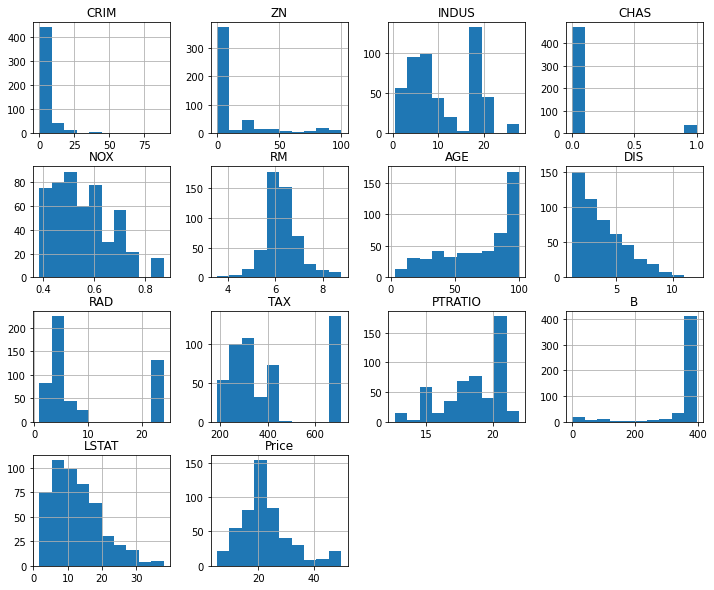

In [7]:
df_boston.hist(figsize=(12, 10));

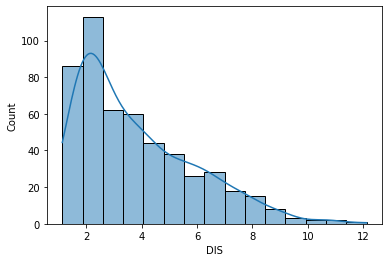

In [8]:
sns.histplot(data=df_boston,x='DIS',bins=15, kde=True)

In [9]:
print('Mean is: ',df_boston['DIS'].mean())
print('Median is: ',df_boston['DIS'].median())
print('Mode is: ',df_boston['DIS'].mode())

Mean is:  3.795042687747036
Median is:  3.2074499999999997
Mode is:  0    3.4952
dtype: float64


**The mean is greater than median, so the chart is right skew.**

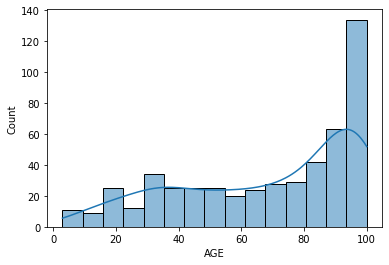

In [10]:
sns.histplot(data=df_boston,x='AGE',bins=15, kde=True)

In [11]:
print('Mean is: ',df_boston['AGE'].mean())
print('Median is: ',df_boston['AGE'].median())
print('Mode is: ',df_boston['AGE'].mode())

Mean is:  68.57490118577076
Median is:  77.5
Mode is:  0    100.0
dtype: float64


**The median is greater than mean, so the chart is left skew.**

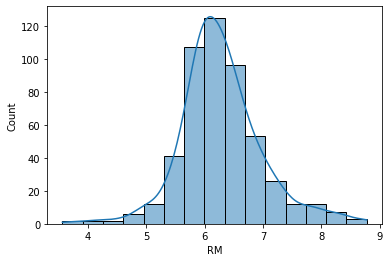

In [12]:
sns.histplot(data=df_boston,x='RM',bins=15, kde=True)

In [13]:
print('Mean is: ',df_boston['RM'].mean())
print('Median is: ',df_boston['RM'].median())
print('Mode is: ',df_boston['RM'].mode())
print('Standard devasuion is: ',df_boston['RM'].std())

Mean is:  6.284634387351779
Median is:  6.2085
Mode is:  0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64
Standard devasuion is:  0.7026171434153233


**The median is equal to the mean, so the chart is zero skew.**

## Q4: Use Skew function of Pandas to print skewness of each feature.

In [14]:
df_boston.skew(axis=0).sort_values(ascending=False)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
Price      1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

## Q5: Use numpy to draw normal distribution.

In [15]:
mu, sigma = 6.28, 0.7 # mean and standard deviation
s = np.random.normal(mu, sigma,1000)

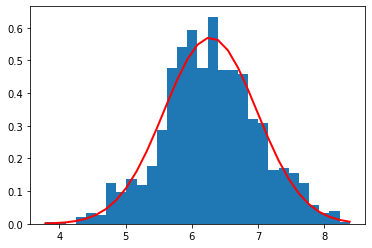

In [16]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Q6: Use numpy to draw uniform distribution.

In [17]:
s1=np.random.uniform(-1,0,506)
# s1.shape
# s1

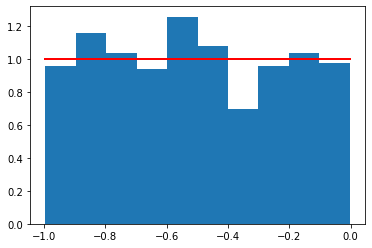

In [18]:
count, bins, ignored = plt.hist(s1, 10, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## Q7: Use numpy to draw binomial distribution.

## Q8: Simulate Two Coin Flips, then draw the result distribution.

In [19]:
from numpy import random

In [20]:
import random
def head_tails(number_of_flips):
    tails_count=0
    heads_count=0
    for i in range(number_of_flips):
        rand=random.randint(1,2)
        if rand ==1:
           tails_count+=1
           print(tails_count,'tails')
        else:
           heads_count +=1
           print(heads_count,'heads')
    print("tails",tails_count)
    print('heads',heads_count)
             

In [21]:
head_tails(10)

1 heads
1 tails
2 heads
2 tails
3 heads
4 heads
3 tails
4 tails
5 tails
5 heads
tails 5
heads 5


In [22]:
sns.distplot( p=0.5, size=1000, hist=True, kde=False)
plt.show()

TypeError: ignored

In [ ]:
sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)
plt.show()